<a href="https://colab.research.google.com/github/smdr111/data_preparation/blob/main/CombiningandMerging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 3-MODUL. MA'LUMOTLARGA ISHLOV BERISH
## 3.3.2 Ma'lumotlar to'plamini uyg'unlashtirish va birlashtirish



### Pandasda ma'lumotlarni birlashtirish

- Merging
- Joining
- Concatenating
- Appending

### Kerakli kutubxonalrni chaqirib olish

In [ ]:
import pandas as pd
import numpy as np

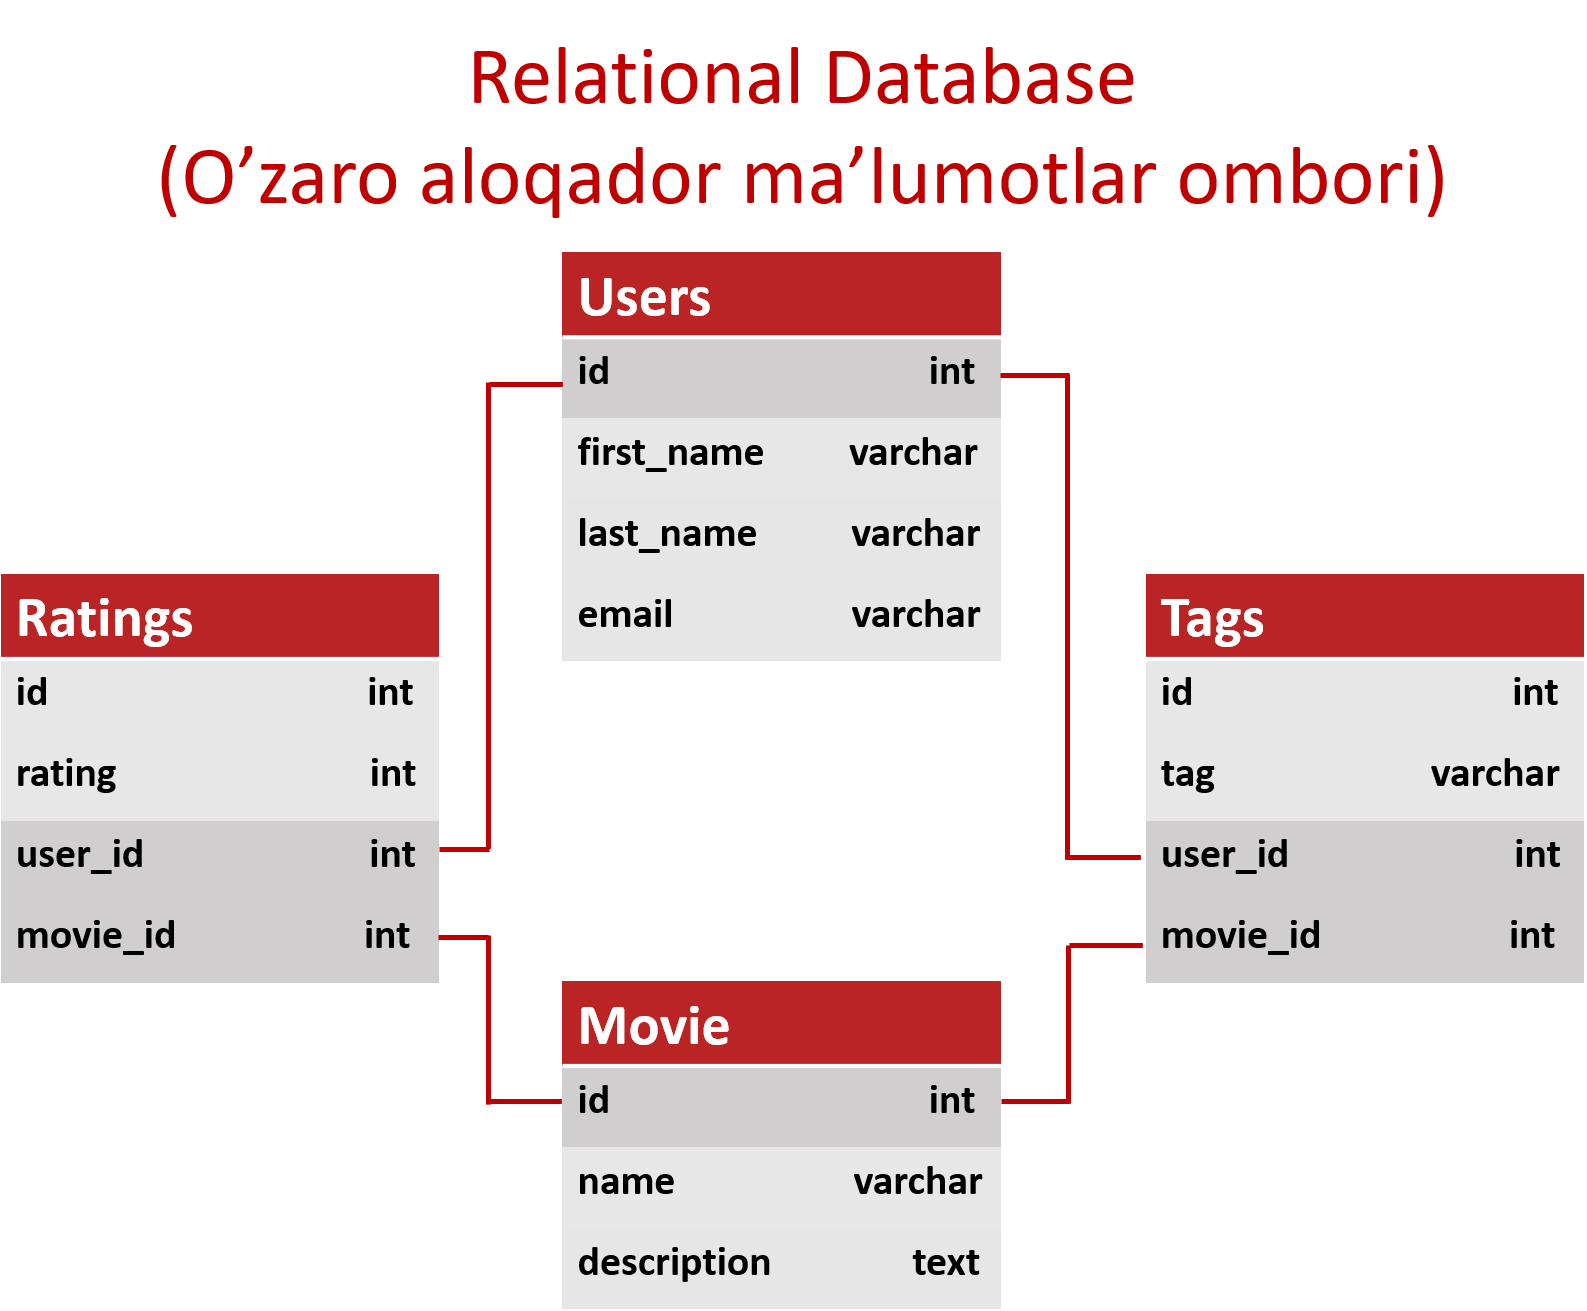

In [ ]:
!git clone https://github.com/MansurCompAI/Practicum_Datasets.git # Github reponi nusxalab olish

Cloning into 'Practicum_Datasets'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
movies = pd.read_csv('/content/Practicum_Datasets/IMDb/IMDb_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   imdb_title_id       85855 non-null  object
 1   title               85855 non-null  object
 2   original_title      85855 non-null  object
 3   year                85855 non-null  object
 4   date_published      85855 non-null  object
 5   genre               85855 non-null  object
 6   duration            85855 non-null  int64 
 7   country             85791 non-null  object
 8   language            85022 non-null  object
 9   director            85768 non-null  object
 10  writer              84283 non-null  object
 11  production_company  81400 non-null  object
 12  actors              85786 non-null  object
 13  description         83740 non-null  object
 14  budget              23710 non-null  object
dtypes: int64(1), object(14)
memory usage: 9.8+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ratings = pd.read_csv('/content/Practicum_Datasets/IMDb/IMDb_ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   weighted_average_vote  85855 non-null  float64
 2   total_votes            85855 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ MB


## `Merging`

In [ ]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,$ 2250
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,$ 45000
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,NaN


In [ ]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188
3,tt0002101,5.2,446
4,tt0002130,7.0,2237


In [ ]:
movies_ratings = pd.merge(movies, ratings) # umumiy ustun ustida 2 ta datasetni uyg'unlashtirish
movies_ratings.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'budget',
       'weighted_average_vote', 'total_votes'],
      dtype='object')

In [ ]:
extracted = movies_ratings[['title',  'year', 'weighted_average_vote']] # ba'zi ustunlarni ajratib olish
extracted

,title,year,weighted_average_vote
0,Miss Jerry,1894,5.9
1,The Story of the Kelly Gang,1906,6.1
2,Den sorte drøm,1911,5.8
3,Cleopatra,1912,5.2
4,L'Inferno,1911,7.0
...,...,...,...
85850,Le lion,2020,5.3
85851,De Beentjes van Sint-Hildegard,2020,7.7
85852,Padmavyuhathile Abhimanyu,2019,7.9
85853,Sokagin Çocuklari,2019,6.4


### Sodda misollar

In [ ]:
A = pd.DataFrame({'Transport': ['poezd', 'avtomabil', 'kema'],
                  'Tezligi':['70', '180', '45']})

A

,Transport,Tezligi
0,poezd,70
1,avtomabil,180
2,kema,45


In [ ]:
B = pd.DataFrame({'Transport': ['poezd', 'avtomabil', 'tramvay'],
                  'Narxi':['98000', '10000', '65000']})

B

,Transport,Narxi
0,poezd,98000
1,avtomabil,10000
2,tramvay,65000


### `merge`

### Ichki uyg'unlashish

In [ ]:
merged = pd.merge(A, B, how='inner') # inner join - ichki
merged

,Transport,Tezligi,Narxi
0,poezd,70,98000
1,avtomabil,180,10000


### Tashqi uyg'unlashish

In [ ]:
merged_outer = pd.merge(A, B, how='outer') # outer join - tashqi
merged_outer

,Transport,Tezligi,Narxi
0,poezd,70,98000
1,avtomabil,180,10000
2,kema,45,NaN
3,tramvay,NaN,65000


### Chap taraflama uyg'unlashish

In [ ]:
merged_left = pd.merge(A, B, how='left') # left join - chap
merged_left

,Transport,Tezligi,Narxi
0,poezd,70,98000
1,avtomabil,180,10000
2,kema,45,NaN


### O'ng taraflama uyg'unlashish

In [ ]:
merged_right = pd.merge(A, B, how='right') # right join - o'ng
merged_right

,Transport,Tezligi,Narxi
0,poezd,70,98000
1,avtomabil,180,10000
2,tramvay,NaN,65000


## Indeks va ustun ustida birlashtirish

In [ ]:
A = pd.DataFrame({'Transport_turi': ['poezd', 'avtomabil', 'kema'],
                  'Tezligi':['70', '180', '45']})

A

,Transport_turi,Tezligi
0,poezd,70
1,avtomabil,180
2,kema,45


In [ ]:
B

,Transport,Narxi
0,poezd,98000
1,avtomabil,10000
2,tramvay,65000


In [ ]:
merg = pd.merge(A, B, left_on='Transport_turi', right_on='Transport')
merg

,Transport_turi,Tezligi,Transport,Narxi
0,poezd,70,poezd,98000
1,avtomabil,180,avtomabil,10000


## Indekslar ustida birlashtirish

In [ ]:
A = A.set_index('Transport_turi')
A

,Tezligi
Transport_turi,
poezd,70
avtomabil,180
kema,45


In [ ]:
B

,Transport,Narxi
0,poezd,98000
1,avtomabil,10000
2,tramvay,65000


In [ ]:
merged1 = pd.merge(A, B, left_index=True, right_on='Transport')
merged1

,Tezligi,Transport,Narxi
0,70,poezd,98000
1,180,avtomabil,10000


In [ ]:
B = B.set_index('Transport')
B

,Narxi
Transport,
poezd,98000
avtomabil,10000
tramvay,65000


In [ ]:
merged2 = pd.merge(A, B, left_index=True, right_index=True)
merged2

,Tezligi,Narxi
poezd,70,98000
avtomabil,180,10000


### Concatenation

In [ ]:
!git clone https://github.com/MansurCompAI/Practicum_Datasets.git

Cloning into 'Practicum_Datasets'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 2), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
bank = pd.read_csv("/content/Practicum_Datasets/bank.csv", delimiter=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
bank1, bank2 = bank[:2521], bank[2521:] # bank ma'lumotlar to'plamini bank1 va bank2 ga bo'lib yuborish
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2521,46,unemployed,married,secondary,no,3533,yes,no,cellular,12,aug,235,2,-1,0,unknown,no
2522,59,blue-collar,divorced,secondary,no,3573,no,no,cellular,15,may,44,1,-1,0,unknown,no
2523,44,management,divorced,tertiary,no,476,yes,yes,unknown,26,may,127,2,-1,0,unknown,no
2524,35,blue-collar,married,secondary,no,1257,yes,no,cellular,20,apr,93,3,329,7,failure,no
2525,55,blue-collar,married,unknown,no,23,no,no,cellular,30,jan,143,1,2,3,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### `concat`

In [ ]:
pd.concat([bank1, bank2]) # 2 ta datasetni ulash

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
bank1, bank2, bank3 = bank[:1000], bank[1000:2000], bank[2000:]  #bank ma'lumotlar to'plamini bank1, bank2 va bank3 ga bo'lib yuborish
bank3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2000,28,blue-collar,married,primary,no,60,yes,no,cellular,6,may,161,1,337,1,failure,no
2001,45,blue-collar,married,primary,no,137,yes,yes,unknown,16,may,187,19,-1,0,unknown,no
2002,32,admin.,single,tertiary,no,1583,yes,no,cellular,19,nov,100,1,182,1,failure,no
2003,46,admin.,married,secondary,no,-121,yes,yes,cellular,8,jul,214,4,-1,0,unknown,no
2004,28,blue-collar,single,secondary,no,1065,yes,yes,cellular,17,apr,406,1,317,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
pd.concat([bank1, bank2, bank3], axis=0) # 3 ta datasetni ulash

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
pd.concat([bank1, bank2, bank3], axis=1) # 3 ta datasetni ulash

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30.0,jul,329.0,5.0,-1.0,0.0,unknown,no
4517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9.0,may,153.0,1.0,-1.0,0.0,unknown,no
4518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,technician,married,secondary,no,295.0,no,no,cellular,19.0,aug,151.0,11.0,-1.0,0.0,unknown,no
4519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6.0,feb,129.0,4.0,211.0,3.0,other,no


In [ ]:
bank1 = bank1.set_index('age') # indeksni o'zgartirish
bank1

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,blue-collar,married,secondary,no,1370,yes,no,cellular,11,may,472,2,-1,0,unknown,no
58,management,married,secondary,no,37,no,no,cellular,18,aug,84,11,-1,0,unknown,no
34,management,single,tertiary,no,673,yes,yes,cellular,20,nov,271,1,184,1,failure,no


In [ ]:
bank2 = bank2.set_index('age') # indeksni o'zgartirish
bank2

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
34,technician,married,secondary,no,209,yes,yes,cellular,8,apr,375,2,-1,0,unknown,no
31,technician,single,tertiary,no,438,yes,no,cellular,12,aug,130,2,-1,0,unknown,no
39,admin.,single,secondary,no,1242,yes,no,unknown,12,may,303,3,-1,0,unknown,no
34,entrepreneur,married,tertiary,no,355,yes,no,unknown,16,may,261,1,-1,0,unknown,no
24,blue-collar,married,secondary,no,204,yes,yes,cellular,17,apr,229,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,admin.,single,secondary,no,-23,no,no,cellular,20,nov,48,2,-1,0,unknown,no
58,management,divorced,tertiary,no,1573,yes,yes,cellular,17,nov,279,1,-1,0,unknown,no
24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,no


In [ ]:
pd.concat([bank1, bank2], axis=1) # xatolik yuz beradi

ValueError: ignored

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Uzun datasetdan Keng dataset olish (`pivot`)

In [ ]:
data = pd.read_csv('/content/Practicum_Datasets/data_pivot.csv')
data

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [ ]:
pivoted_data = data.pivot('date', 'item', 'value')
pivoted_data

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [ ]:
data['value2'] = np.random.randn(len(data))
data

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.850904
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.730510
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.305433
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.991889
4,1959-06-30 23:59:59.999999999,infl,2.340,0.700168
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,0.440101
605,2009-06-30 23:59:59.999999999,unemp,9.200,0.972910
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,0.272021
607,2009-09-30 23:59:59.999999999,infl,3.560,0.712564


In [ ]:
pivoted_data = data.pivot('date', 'item')
pivoted_data

value             ...    value2          
item                           infl    realgdp  ...   realgdp     unemp
date                                            ...                    
1959-03-31 23:59:59.999999999  0.00   2710.349  ... -0.850904 -0.305433
1959-06-30 23:59:59.999999999  2.34   2778.801  ... -0.991889 -0.504236
1959-09-30 23:59:59.999999999  2.74   2775.488  ... -1.348904  0.424165
1959-12-31 23:59:59.999999999  0.27   2785.204  ... -0.165414 -1.704004
1960-03-31 23:59:59.999999999  2.31   2847.699  ... -0.389808 -1.245334
...                             ...        ...  ...       ...       ...
2008-09-30 23:59:59.999999999 -3.16  13324.600  ... -0.100935 -0.163273
2008-12-31 23:59:59.999999999 -8.79  13141.920  ... -0.018299 -0.761339
2009-03-31 23:59:59.999999999  0.94  12925.410  ... -0.463722 -1.572873
2009-06-30 23:59:59.999999999  3.37  12901.504  ...  1.971292  0.972910
2009-09-30 23:59:59.999999999  3.56  12990.341  ...  0.272021 -1.242930

[203 rows x 6 columns]

In [ ]:
pivoted_data['value'].head(10)

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
1960-06-30 23:59:59.999999999,0.14,2834.390,5.2
1960-09-30 23:59:59.999999999,2.70,2839.022,5.6
1960-12-31 23:59:59.999999999,1.21,2802.616,6.3
1961-03-31 23:59:59.999999999,-0.40,2819.264,6.8
